# Read and process the file

In [1]:
import pandas as pd
df=pd.read_csv("titanic-passengers.csv",sep=";")

df.drop_duplicates()
df.drop(columns='Ticket',inplace=True)
df=df.dropna(subset=['Embarked'])
df['Age'].fillna(df['Age'].mean(),inplace=True)
cabinC=df['Cabin'].value_counts().keys()[0]
df['Cabin'].fillna(cabinC,inplace=True)


In [2]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":       "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

In [3]:
titles=list(Title_Dictionary.keys())
columnTitle=[]
for i,row in df.iterrows():
    for title in titles:
        titlee=title+"."
        if titlee in row["Name"]:
            columnTitle.append(title)
            
df["Title"] = columnTitle


In [4]:

df['Sex']=df['Sex'].map({"male":1,"female":0})
#df["Survived"]=df["Survived"].map({"Yes":1,"No":0})

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Title'])
df['TitleEncod']=le.transform(df['Title'])

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,TitleEncod
0,343,No,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,G6,S,Mr,11
1,76,No,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,F G73,S,Mr,11
2,641,No,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,G6,S,Mr,11
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,G6,S,Mrs,12
4,672,No,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,B71,S,Mr,11


# Apply the decision tree

In [21]:
from sklearn import tree  
from sklearn.tree import DecisionTreeClassifier  , plot_tree 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#features extraction
x=df[["PassengerId", "Pclass", "Sex", "Age", "TitleEncod"]]
y= df["Survived"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)


#applying tree algorithm
tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.6966292134831461


In [7]:
tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                              min_weight_fraction_leaf=0.0, max_features=None, random_state=0, max_leaf_nodes=5, 
                              min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7078651685393258


# Change some parameters of decision tree to improve its score 

In [32]:
tree = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=5, min_samples_leaf=1, 
                              min_weight_fraction_leaf=0.0, max_features=None, random_state=0, max_leaf_nodes=2, 
                              min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7415730337078652


# Find the best parametrs for decision tree by using GridSarchCV

[Text(0.5, 0.75, 'X[2] <= 0.5\nentropy = 0.96\nsamples = 711\nvalue = [439, 272]'),
 Text(0.25, 0.25, 'entropy = 0.811\nsamples = 256\nvalue = [64, 192]'),
 Text(0.75, 0.25, 'entropy = 0.671\nsamples = 455\nvalue = [375, 80]')]

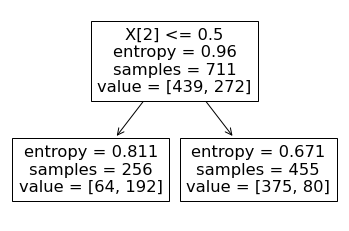

In [33]:
from sklearn.tree import plot_tree

plot_tree(tree)

In [18]:
from sklearn.model_selection import GridSearchCV

svc =  DecisionTreeClassifier()

clf = GridSearchCV(estimator=svc,
             param_grid={'criterion':('gini', 'entropy'), 'splitter':('best', 'random'), 'max_features': ('auto', 'sqrt', 'log2')})

clf.fit(x_train, y_train)
    
    
#sorted(clf.cv_results_.keys())
print(clf.best_params_,clf.best_score_)

{'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'random'} 0.7679602088052793


In [34]:
tree = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                              min_weight_fraction_leaf=0.0, max_features='sqrt', random_state=0, max_leaf_nodes=5, 
                              min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)

[Text(0.4444444444444444, 0.875, 'X[2] <= 0.046\ngini = 0.472\nsamples = 711\nvalue = [439, 272]'),
 Text(0.2222222222222222, 0.625, 'X[1] <= 1.41\ngini = 0.375\nsamples = 256\nvalue = [64, 192]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.049\nsamples = 79\nvalue = [2, 77]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.455\nsamples = 177\nvalue = [62, 115]'),
 Text(0.6666666666666666, 0.625, 'X[3] <= 12.283\ngini = 0.29\nsamples = 455\nvalue = [375, 80]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.499\nsamples = 29\nvalue = [14, 15]'),
 Text(0.7777777777777778, 0.375, 'X[1] <= 1.821\ngini = 0.259\nsamples = 426\nvalue = [361, 65]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.444\nsamples = 90\nvalue = [60, 30]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.187\nsamples = 336\nvalue = [301, 35]')]

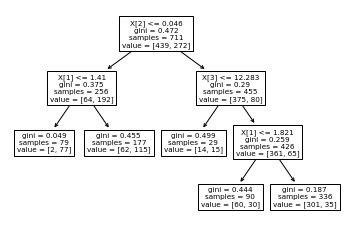

In [35]:
plot_tree(tree)

In [38]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics  

clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7415730337078652
